## Intro to Hypothesis Testing

### Introduction:

Hypothesis testing is a statistical method used to make inferences about a population based on a sample of data. It involves the formulation of two competing hypotheses, the null hypothesis (H0) and the alternative hypothesis (H1), and then using statistical methods to decide whether there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis.

### Key Concepts:

1. **Null Hypothesis (H0):**
   - The null hypothesis represents a statement of no effect or no difference.
   - Denoted as H0, it is typically what researchers aim to test against.

2. **Alternative Hypothesis (H1):**
   - The alternative hypothesis represents the opposite of the null hypothesis.
   - Denoted as H1, it reflects the researcher's claim or the presence of an effect.

3. **Significance Level (α):**
   - The significance level, often denoted as α, is the probability of rejecting the null hypothesis when it is true.
   - Common choices for α are 0.05 or 5%.

4. **Test Statistic:**
   - A test statistic is a numerical value computed from the sample data, used to decide whether to reject the null hypothesis.

5. **P-value:**
   - The p-value is the probability of observing a test statistic as extreme as, or more extreme than, the one computed from the sample data, assuming the null hypothesis is true.
   - A lower p-value suggests stronger evidence against the null hypothesis.

### Steps in Hypothesis Testing:

1. **Formulate Hypotheses:**
   - State the null hypothesis (H0) and the alternative hypothesis (H1).

2. **Choose Significance Level (α):**
   - Decide on the level of significance (α) to determine the critical region.

3. **Collect and Analyze Data:**
   - Collect a sample of data and compute the test statistic.

4. **Compute P-value:**
   - Calculate the p-value associated with the test statistic.

5. **Make a Decision:**
   - If the p-value is less than the significance level (α), reject the null hypothesis. Otherwise, fail to reject the null hypothesis.

6. **Draw Conclusion:**
   - Based on the decision, draw conclusions about the population parameter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest



### Some notes on ddof in np.std()
#### Population Standard Deviation:
The formula for population standard deviation ($\text{std}$ with $\text{ddof}=0$) is given by:

$$
\text{std} = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \bar{x})^2}{N}}
$$

where:
- $N$ is the total number of data points.
- $x_i$ is each data point.
- $\bar{x}$ is the mean of the data points.

#### Sample Standard Deviation:
The formula for sample standard deviation ($\text{std}$ with $\text{ddof}=1$) is given by:

$$
\text{std} = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \bar{x})^2}{N-1}}
$$

where:
- $N$ is the total number of data points.
- $x_i$ is each data point.
- $\bar{x}$ is the mean of the data points.

Using $\text{ddof}=1$ is commonly recommended when calculating the standard deviation for a sample because it corrects for the bias in the estimation of the population standard deviation. The adjustment accounts for the fact that you're using a sample to estimate the population standard deviation.

In [2]:
# Let's generate sample from N(100, 10):

true_mu = 120
true_sigma = 20
sample_size = 100

true_distribution = stats.norm(loc=true_mu, scale=true_sigma)
sample = true_distribution.rvs(size=sample_size)

print(f'sample size: \t{len(sample)} \nmu: \t\t{np.mean(sample):5.3f} \nsigma: \t\t{np.std(sample, ddof=1):5.3f}')

sample size: 	100 
mu: 		117.640 
sigma: 		20.464


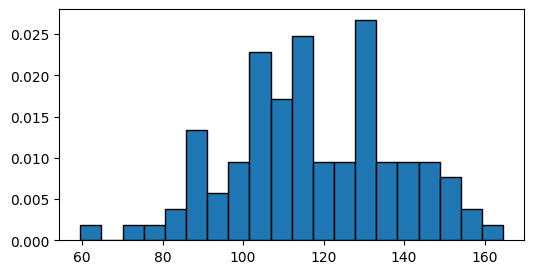

In [3]:
plt.figure(figsize = (6, 3))
plt.hist(sample, bins=20, density=True, edgecolor='black')
plt.show()

### Now state the hypothesis:

### Hypothesis Test 1 (One-Sided Test):
- **Null Hypothesis (H0):**  $\mu = 100$
- **Alternative Hypothesis (H1):** $\mu > 100$  



#### Test Statistic:
The test statistic for this hypothesis test involves calculating the sample mean ($\bar{X}$), which is defined as the sum of all individual values ($X_i$) divided by the sample size (N).

$$
\bar{X} = \frac{\sum_{i=1}^{N} X_i}{N}
$$

The sample mean represents the average value of the observations in the sample. In the context of this hypothesis test, it serves as a key component in determining whether there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis.



#### Q1: What is the probability to observe such or less extreeme values of statistic under the assumption of Null Hypothesis?  

**Answer:**  
Let's calculate $\mathbb{E}[\bar{X}]$ and $\mathbb{Var}\bar{X}$:  
Given that:  
-  $X \sim \mathcal{N}(\mu, \sigma)$, where $\mu$ is the mean and $\sigma$ is the standard deviation.  
- $X_1, X_2, \cdots , X_n$ are i.i.d. $\sim \mathcal{N}(\mu, \sigma)$  
And using:
\begin{align*}
\mathbb{E}[aX] &= a\mathbb{E}[X] \\
\mathbb{E}[X_1 + X_2] &= \mathbb{E}[X_1] + \mathbb{E}[X_2]  \\
\mathbb{Var}[aX] &= a^2\mathbb{Var}[X] \\
\text{Var}(X_1 + X_2 + \ldots + X_N) &= \sum_{i=1}^{N}\text{Var}(X_i) + \sum_{i \neq j} \text{Cov}(X_i, X_j)
\end{align*}


1. **Expected Value ($\mathbb{E}[\bar{X}]$):**
   The expected value of $\bar{X}$ (the sample mean) is the same as the population mean ($\mu$):
   $$ \mathbb{E}[\bar{X}] = \mathbb{E}[\frac{X_1}{N} + \frac{X_2}{N} + \ldots + \frac{X_N}{N}] = \frac{N}{N} \mathbb{E}[X]  = \mu$$ 


2. **Variance ($\mathbb{Var}(\bar{X})$):**
   The variance of $\bar{X}$ is given by $\frac{\sigma^2}{N}$, where $N$ is the sample size:
   $$ \mathbb{Var}(\bar{X}) =  \mathbb{Var}[\frac{X_1}{N} + \frac{X_2}{N} + \ldots + \frac{X_N}{N}] = \frac{N}{N^2}\mathbb{Var}[X] = \frac{\sigma^2}{N} $$

So, we obtained that $\bar{X}$:  
$$\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{N})$$  

Given our obtained value of $\bar{X}$ from sample, the probability of such or less extreeme statistic value is:  
$P(Y \leq \bar{X}) = P(Z \leq \frac{\sqrt{N}\left(\bar{X} - \mu \right)}{\sigma}) = \Phi(\frac{\sqrt{N}\left(\bar{X} - \mu \right)}{\sigma})$

In [4]:
def z_test(data: list[float], popmean: float, popvariance: float, 
        alternative: str = 'greater', use_sample_variance: str = True) -> dict:
    """
    Perform a one-sample z-test.

    Parameters:
    - data (list[float]): A list of numerical values representing the sample data.
    - popmean (float): The hypothesized population mean under the null hypothesis.
    - popvariance (float): The population variance under the null hypothesis.
    - alternative (str): The alternative hypothesis. Options: 'greater', 'less', or 'two_sided'.
                         Default is 'greater'.
    - use_sample_variance (bool): If True, use the sample variance; if False, use the specified population variance.
                                  Default is True.

    Returns:
    - dict: A dictionary containing the z-score and p-value.

    Raises:
    - KeyError: If the specified alternative is not one of 'greater', 'less', or 'two_sided'.
    """
    
    x_mean = np.mean(data)
    sample_size = len(data)

    if use_sample_variance:
        var = np.var(data, ddof=1)
    else:
        var = popvariance

    z_score = np.sqrt(sample_size)*(x_mean - popmean)/np.sqrt(var)
    
    if alternative == 'greater':
        p_value = 1 - stats.norm.cdf(z_score)
    elif alternative == 'less':
        p_value = stats.norm.cdf(z_score)
    elif alternative == 'two_sided':
        p_value = 2*stats.norm.cdf(z_score)
    else:
        raise KeyError(f"{alternative} is not implemented. Use: 'greater', 'less' or 'two_sided'")
    return {'z_score': z_score, 'p_value': p_value}

#### Now let's compare our implementation to the one in statsmodels.

**Note:**  
The `z_test` function we implemented uses either the sample variance or the specified population variance. In contrast, statsmodels' `ztest` function uses the sample variance obtained from the sample data.


In [5]:
for alternative1, alternative2 in zip(['greater', 'less', 'two_sided'], ['larger', 'smaller', 'two-sided']):
    
    # Compare our realization to statsmodels ztest:
    print(f'Alternative: {alternative1}')
    result = z_test(sample, true_mu, true_sigma**2, alternative1)
    print(f"Z-statistic: {result['z_score']}\np-value: {result['p_value']}")
    # Perform a one-sample z-test
    z_stat, p_value = ztest(sample, value=true_mu, alternative=alternative2)
    print(f"Z-statistic: {z_stat}\np-value: {p_value}\n")

Alternative: greater
Z-statistic: -1.153025249041385
p-value: 0.8755499894356181
Z-statistic: -1.153025249041385
p-value: 0.8755499894356181

Alternative: less
Z-statistic: -1.153025249041385
p-value: 0.12445001056438187
Z-statistic: -1.153025249041385
p-value: 0.12445001056438187

Alternative: two_sided
Z-statistic: -1.153025249041385
p-value: 0.24890002112876375
Z-statistic: -1.153025249041385
p-value: 0.24890002112876375



As we can see the results are identical.

#### Q2: What are alternatives: 'less', 'greater' and 'two-sided'?  


#### One-Sided Hypothesis Tests:

##### 1. 'Less' (Lower Tail):

- **Null Hypothesis (H0):** $ \mu = \mu_0 $
  
- **Alternative Hypothesis (H1):** $ \mu < \mu_0 $

  **Test Statistic:** $ z = \frac{{\bar{X} - \mu_0}}{{\frac{S}{\sqrt{n}}}} $

  **Critical Value (z_crit):** $ z_{\text{crit}} = \text{Z-Score for } \alpha $

##### 2. 'Greater' (Upper Tail):

- **Null Hypothesis (H0):** $ \mu = \mu_0 $
  
- **Alternative Hypothesis (H1):** $ \mu > \mu_0 $

  **Test Statistic:** $ z = \frac{{\bar{X} - \mu_0}}{{\frac{S}{\sqrt{n}}}} $

  **Critical Value (z_crit):** $ z_{\text{crit}} = \text{Z-Score for } 1 - \alpha $

#### Two-Sided Hypothesis Test:

##### 3. 'Two-Sided':

- **Null Hypothesis (H0):** $ \mu = \mu_0 $
  
- **Alternative Hypothesis (H1):** $ \mu \neq \mu_0 $

  **Test Statistic:** $ z = \frac{{\bar{X} - \mu_0}}{{\frac{S}{\sqrt{n}}}} $

  **Critical Values (z_crit):** $ z_{\text{crit, lower}} = \text{Z-Score for } \frac{\alpha}{2} $ and $ z_{\text{crit, upper}} = \text{Z-Score for } 1 - \frac{\alpha}{2} $

In these formulas:
- $ \bar{X} $ is the sample mean.
- $ \mu $ is the population mean (under the null hypothesis).
- $ \mu_0 $ is the specified threshold or value.
- $ S $ is the sample standard deviation.
- $ n $ is the sample size.

The critical values are used to determine the rejection region. If the test statistic falls into the rejection region, the null hypothesis is rejected. If it falls outside the rejection region, the null hypothesis is not rejected.

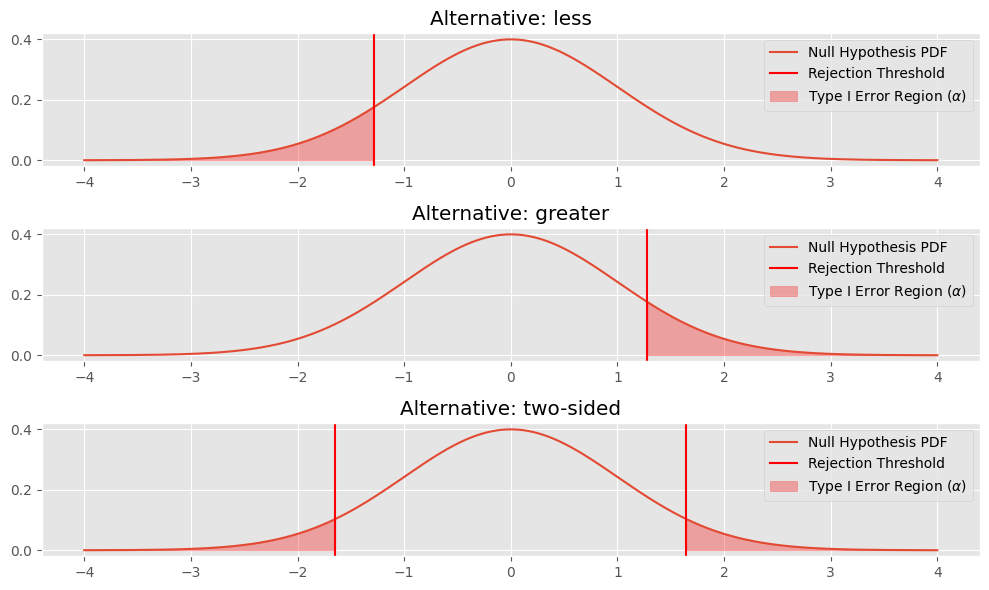

In [6]:
from mystats.plots.ztest.region import plot_rejection_regions


plot_rejection_regions(0, 1, 0.1)

#### Q3: What are Type I and Type II Errors?


1. **Type I Error (False Positive):**
   - **Definition:** Rejecting a true null hypothesis.
   - **Symbol:** $ \alpha $ (alpha)
   - **Explanation:** This error occurs when a statistical test incorrectly concludes that there is a significant effect or difference when, in reality, there is none. The probability of committing a Type I error is denoted by $ \alpha $ and is often set as the significance level (e.g., 0.05 or 5%).

2. **Type II Error (False Negative):**
   - **Definition:** Failing to reject a false null hypothesis.
   - **Symbol:** $ \beta $ (beta)
   - **Explanation:** This error occurs when a statistical test fails to detect a significant effect or difference that truly exists. The probability of committing a Type II error is denoted by $ \beta $. The power of a statistical test (1 - $ \beta $) is its ability to correctly reject a false null hypothesis.

In summary:

- **Type I Error:** Incorrectly concluding that there is an effect when there is none.
  - Probability symbol: $ \alpha $ (alpha)
  - Controlled by setting the significance level.

- **Type II Error:** Incorrectly concluding that there is no effect when there is one.
  - Probability symbol: $ \beta $ (beta)
  - Inversely related to the power of the test (Power = 1 - $ \beta $).


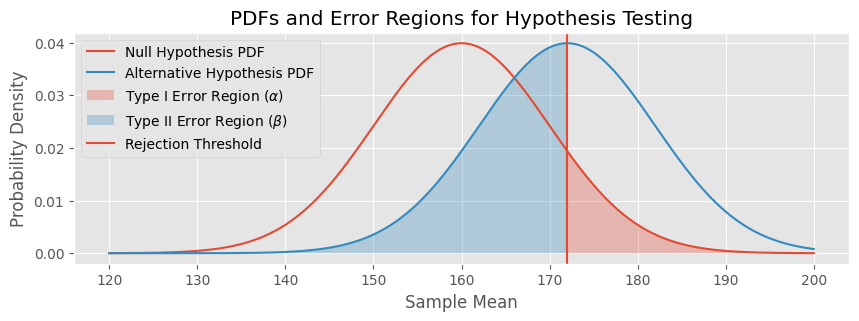

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Set the ggplot style
plt.style.use('ggplot')

# Given parameters
null_mean = 160  # Null hypothesis mean
std_dev = 10  # Standard deviation
sample_mean_threshold = 172  # Threshold for rejecting the null hypothesis


# Set up the x-axis values
x = np.linspace(null_mean - 4 * std_dev, null_mean + 4 * std_dev, 1000)

# Null hypothesis PDF
null_hypothesis_pdf = norm.pdf(x, loc=null_mean, scale=std_dev)

# Alternative hypothesis PDF
alternative_hypothesis_pdf = norm.pdf(x, loc=sample_mean_threshold, scale=std_dev)

# Plot the PDFs
plt.figure(figsize=(10, 3))
plt.plot(x, null_hypothesis_pdf, label='Null Hypothesis PDF')
plt.plot(x, alternative_hypothesis_pdf, label='Alternative Hypothesis PDF')

# Shade the region for Type I error (alpha)
alpha_region = x[x >= sample_mean_threshold]
plt.fill_between(alpha_region, 0, norm.pdf(alpha_region, loc=null_mean, scale=std_dev),  alpha=0.3, label=r'Type I Error Region ($\alpha$)')

# Shade the region for Type II error (beta)
beta_region = x[x < sample_mean_threshold]
plt.fill_between(beta_region, 0, norm.pdf(beta_region, loc=sample_mean_threshold, scale=std_dev),  alpha=0.3, label=r'Type II Error Region ($\beta$)')

# Highlight the threshold for rejecting the null hypothesis
plt.axvline(x=sample_mean_threshold,  label='Rejection Threshold')

# Set labels and title
plt.title('PDFs and Error Regions for Hypothesis Testing')
plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
